# Lighthouse Labs - Final Project
## Customer Segmentation for Siempre Tequila Sales Enhancement

In [1]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

## 1. EDA & Data Cleaning

In [2]:
# Loading the Customer Sales Data for the project
df = pd.read_csv('Customer Sales Data.csv')

In [3]:
# Shape of the dataframe
print(df.shape)

(3096, 17)


In [4]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dist. STATE                  3096 non-null   object 
 1   Account ID                   3096 non-null   int64  
 2   City                         3096 non-null   object 
 3   OnOff Premises               3088 non-null   object 
 4   Classes of Trade             3096 non-null   object 
 5   Siempre Plata                3096 non-null   float64
 6   Siempre Reposado             3096 non-null   float64
 7   Siempre Anejo                3096 non-null   float64
 8   Siempre Supremo              3096 non-null   float64
 9   Siempre Rebel Cask           3096 non-null   float64
 10  Siempre Exclusivo Vivo       3096 non-null   float64
 11  Total Cases                  3096 non-null   float64
 12  Did Buys                     3096 non-null   int64  
 13  # Purchases       

In [5]:
# Display first few rows
df.head(10)

,Dist. STATE,Account ID,City,OnOff Premises,Classes of Trade,Siempre Plata,Siempre Reposado,Siempre Anejo,Siempre Supremo,Siempre Rebel Cask,Siempre Exclusivo Vivo,Total Cases,Did Buys,# Purchases,# Months Purchased,Rate of Sale: Units / Month,Ave Unit Price
0,GA,29552,ATLANTA,ON,RESTAURANT,423.333333,18.000001,0.333334,0.000000,0.000000,0.333334,442.000002,1,44,12,36.833334,123.371266
1,GA,22593,MARIETTA,ON,BAR/TAVERN,74.833332,0.333334,0.166667,0.000000,0.000000,0.000000,75.333333,1,52,12,6.277778,133.786129
2,GA,30497,SAVANNAH,ON,HOTEL/ MOTEL,58.166664,0.666667,5.000000,0.666667,1.000000,0.666667,66.166665,1,32,12,5.513889,163.255923
3,GA,41833,ATLANTA,ON,RESTAURANT,37.333325,0.000000,0.000000,0.000000,0.000000,0.000000,37.333325,1,27,12,3.111110,135.810298
4,GA,66742,DECATUR,ON,RESTAURANT,27.333334,15.666666,0.000000,0.000000,0.166667,0.166667,43.333334,1,20,10,3.611111,145.509921
5,GA,81934,UNION CITY,OFF,LIQUOR/PACKAGE STORE,25.000000,20.000000,2.000000,1.000000,0.000000,1.000000,49.000000,1,3,3,4.083333,169.214278
6,GA,90225,ATLANTA,ON,RESTAURANT,21.666667,6.999998,1.000000,0.000000,0.166667,0.000000,29.833332,1,10,7,2.486111,148.782744
7,GA,96209,ATLANTA,OFF,LIQUOR/PACKAGE STORE,20.333334,28.166667,12.000000,1.333333,1.333333,0.666666,63.833333,1,10,9,5.319444,184.334063
8,GA,57994,MARIETTA,OFF,LIQUOR/PACKAGE STORE,18.000000,11.000000,3.000000,0.000000,0.000000,0.000000,32.000000,1,1,1,2.666667,158.599669
9,GA,80535,COVINGTON,OFF,LIQUOR/PACKAGE STORE,18.000000,13.000000,11.833333,1.000000,1.000000,1.000000,45.833333,1,5,5,3.819444,194.929404


In [6]:
# Statistical summary of numerical columns
df.describe()

,Account ID,Siempre Plata,Siempre Reposado,Siempre Anejo,Siempre Supremo,Siempre Rebel Cask,Siempre Exclusivo Vivo,Total Cases,Did Buys,# Purchases,# Months Purchased,Rate of Sale: Units / Month,Ave Unit Price
count,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000
mean,55108.428295,2.421781,1.385228,0.550764,0.077735,0.323805,0.145295,4.904608,0.997416,3.456718,2.609819,0.408731,187.308803
std,25611.371811,10.848442,3.744237,3.044656,0.382090,2.942122,1.014144,15.111205,0.050775,5.076036,2.370842,1.248079,105.534523
min,10010.000000,-0.333333,-0.333333,-10.000000,-1.000000,-1.000000,-0.166667,-10.000000,0.000000,0.000000,0.000000,-1.000000,-374.939250
25%,33161.500000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000,1.000000,1.000000,0.055556,171.922683
50%,54872.500000,0.833334,0.333333,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,0.166667,194.934507
75%,77253.000000,2.000000,1.166667,0.500000,0.000000,0.000000,0.000000,4.500000,1.000000,4.000000,3.000000,0.375000,221.140135
max,99954.000000,423.333333,90.000000,140.000000,9.500000,82.000000,30.000000,442.000002,1.000000,101.000000,12.000000,36.833334,682.948634


In [7]:
# Count of unique values in each column
df.nunique()

Dist. STATE                      18
Account ID                     3051
City                           1005
OnOff Premises                    2
Classes of Trade                 19
Siempre Plata                   213
Siempre Reposado                181
Siempre Anejo                    95
Siempre Supremo                  28
Siempre Rebel Cask               53
Siempre Exclusivo Vivo           39
Total Cases                     427
Did Buys                          2
# Purchases                      44
# Months Purchased               13
Rate of Sale: Units / Month     419
Ave Unit Price                 1740
dtype: int64

In [8]:
# Checking for missing values
df.isnull().sum()

Dist. STATE                    0
Account ID                     0
City                           0
OnOff Premises                 8
Classes of Trade               0
Siempre Plata                  0
Siempre Reposado               0
Siempre Anejo                  0
Siempre Supremo                0
Siempre Rebel Cask             0
Siempre Exclusivo Vivo         0
Total Cases                    0
Did Buys                       0
# Purchases                    0
# Months Purchased             0
Rate of Sale: Units / Month    0
Ave Unit Price                 0
dtype: int64

In [9]:
# Taking a look at the missing values in 'OnOff Premises'
premise_null = df[df['OnOff Premises'].isnull()]
premise_null

,Dist. STATE,Account ID,City,OnOff Premises,Classes of Trade,Siempre Plata,Siempre Reposado,Siempre Anejo,Siempre Supremo,Siempre Rebel Cask,Siempre Exclusivo Vivo,Total Cases,Did Buys,# Purchases,# Months Purchased,Rate of Sale: Units / Month,Ave Unit Price
384,GA,75319,Unmatched,NaN,UNASSIGNED,0.333333,0.333334,0.000000,0.000000,0.000000,0.000000,0.666667,1,1,1,0.055556,139.859930
572,GA,70212,SMYRNA,NaN,UNASSIGNED,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,1,1,1,0.041667,206.670000
1203,OK,30778,TULSA,NaN,UNASSIGNED,1.000001,0.166667,0.000000,0.000000,0.000000,0.000000,1.166668,1,6,5,0.097222,184.999760
1378,CA,98046,UNCLASSIFIED,NaN,UNCLASSIFIED,44.666674,32.000008,24.333339,7.500005,8.166672,7.833336,124.500034,1,66,12,1.000000,16.318228
1693,TN,31261,NASHVILLE,NaN,UNASSIGNED,4.500000,3.000000,2.000000,0.000000,0.000000,0.000000,9.500000,1,4,3,0.791667,212.585263
2325,CT,60535,UNCLASSIFIED,NaN,UNCLASSIFIED,0.666667,0.666667,0.833333,0.000000,0.000000,0.000000,2.166667,1,1,1,1.000000,179.529203
2583,WI,42216,UNCLASSIFIED,NaN,UNCLASSIFIED,11.333334,5.000000,3.500001,0.000000,0.000000,0.000000,19.833335,1,17,2,1.000000,0.000000
2949,MO,44453,SAINT LOUIS,NaN,UNASSIGNED,0.166667,0.166667,0.333334,0.333333,0.166667,0.000000,1.166668,1,3,3,0.097222,250.071143


In [10]:
# Dropping rows where 'OnOff Premises' is missing
df.dropna(subset=['OnOff Premises'], inplace=True)

In [11]:
# Checking again for missing values
df.isnull().sum()

Dist. STATE                    0
Account ID                     0
City                           0
OnOff Premises                 0
Classes of Trade               0
Siempre Plata                  0
Siempre Reposado               0
Siempre Anejo                  0
Siempre Supremo                0
Siempre Rebel Cask             0
Siempre Exclusivo Vivo         0
Total Cases                    0
Did Buys                       0
# Purchases                    0
# Months Purchased             0
Rate of Sale: Units / Month    0
Ave Unit Price                 0
dtype: int64

## Data Visualization

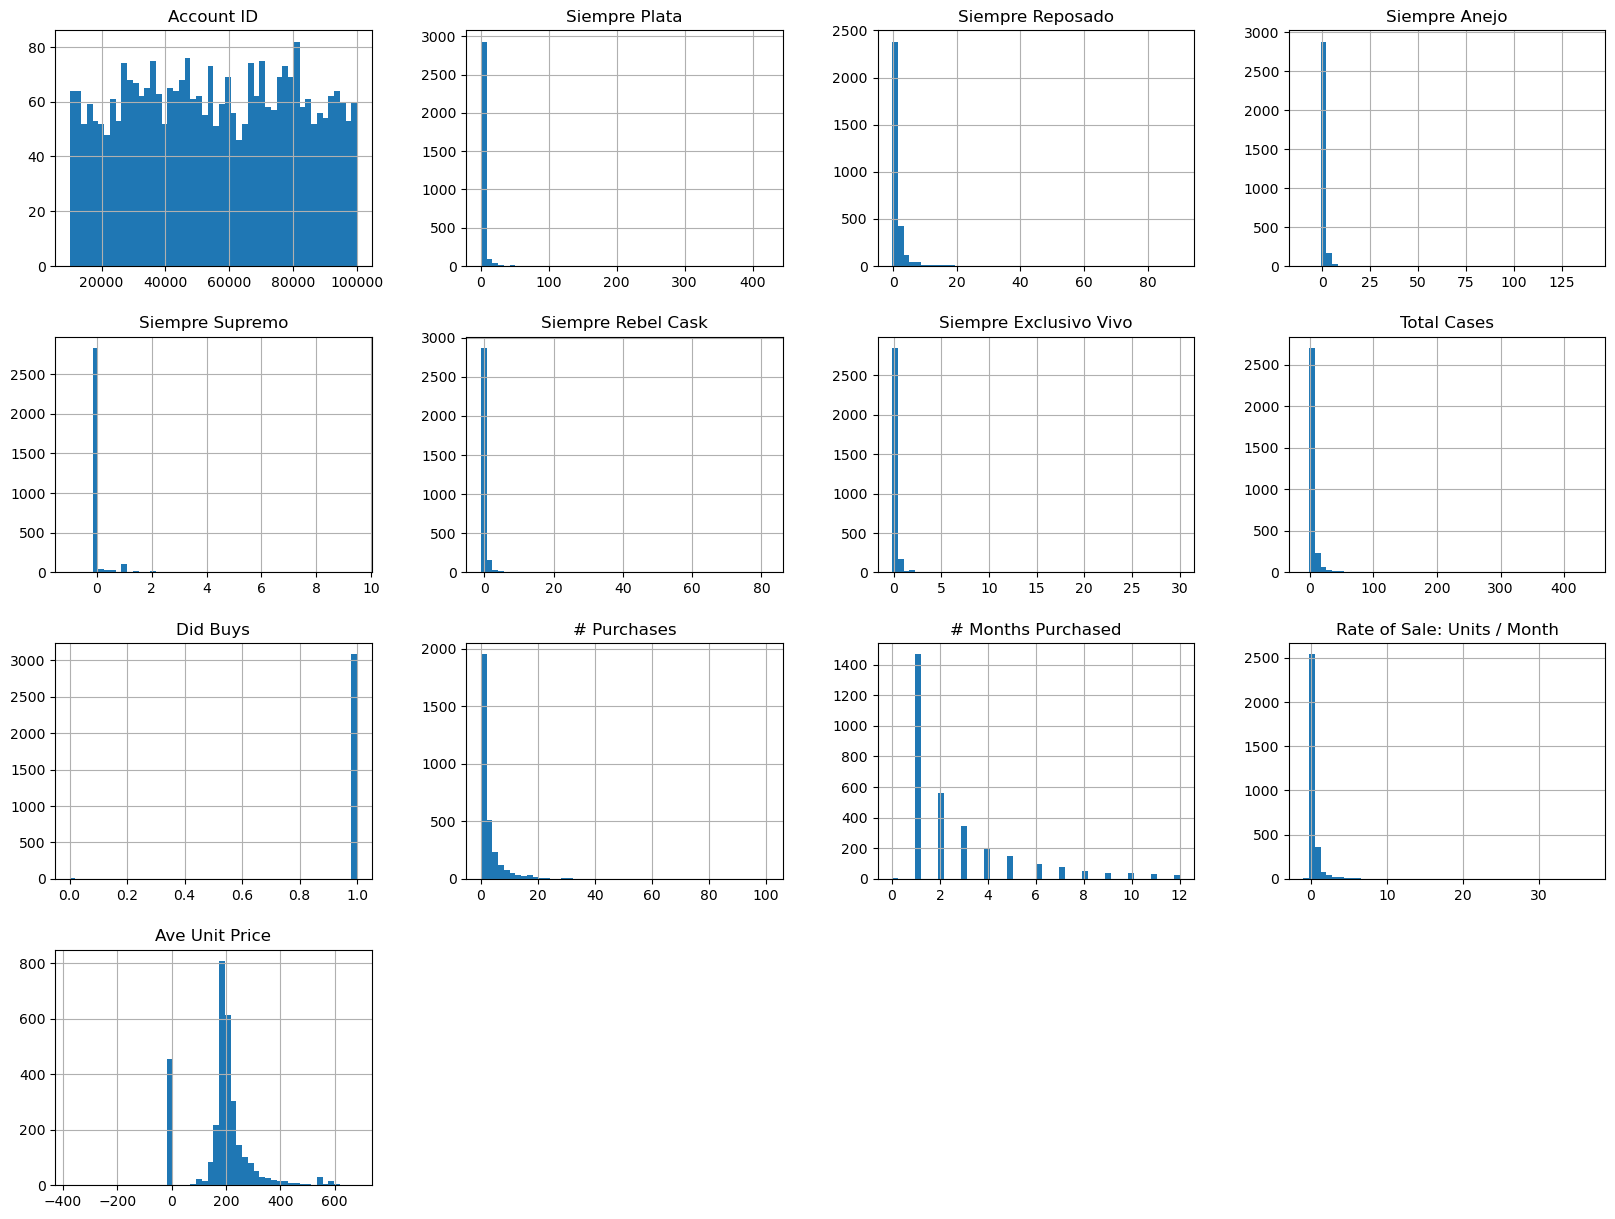

In [12]:
# Histograms for distribution
df.hist(bins=50, figsize=(20,15))
plt.show()

## Outlier Detection

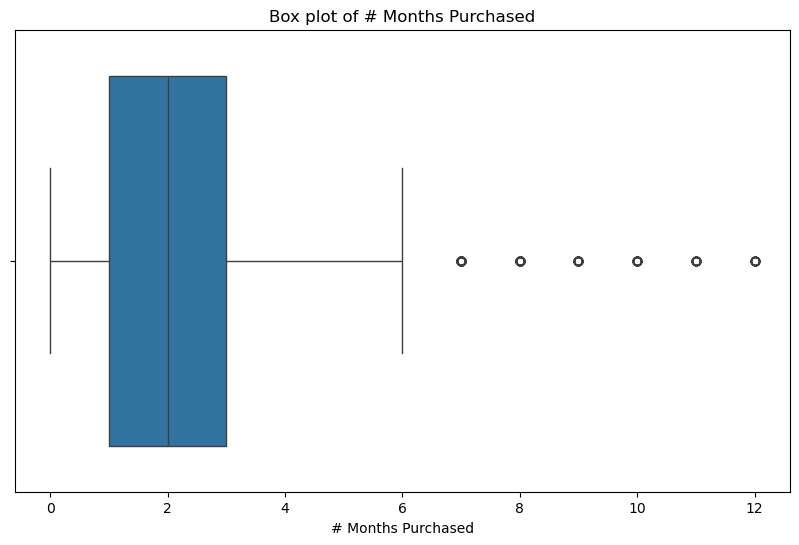

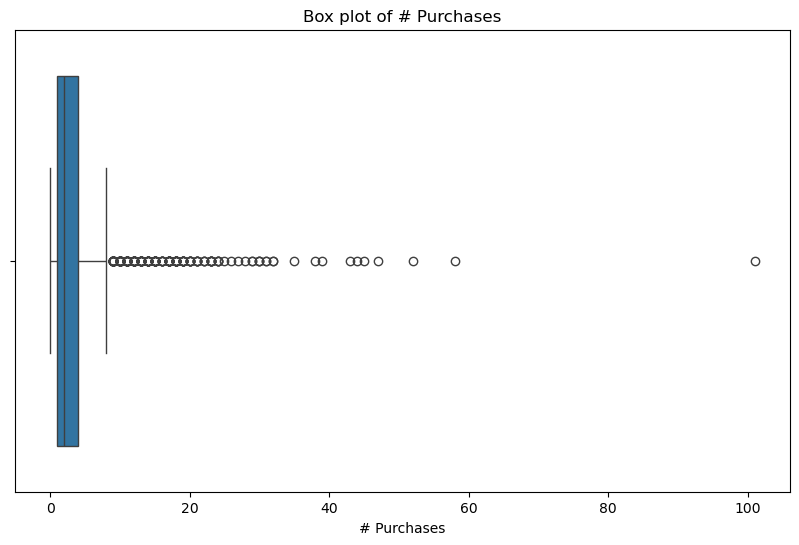

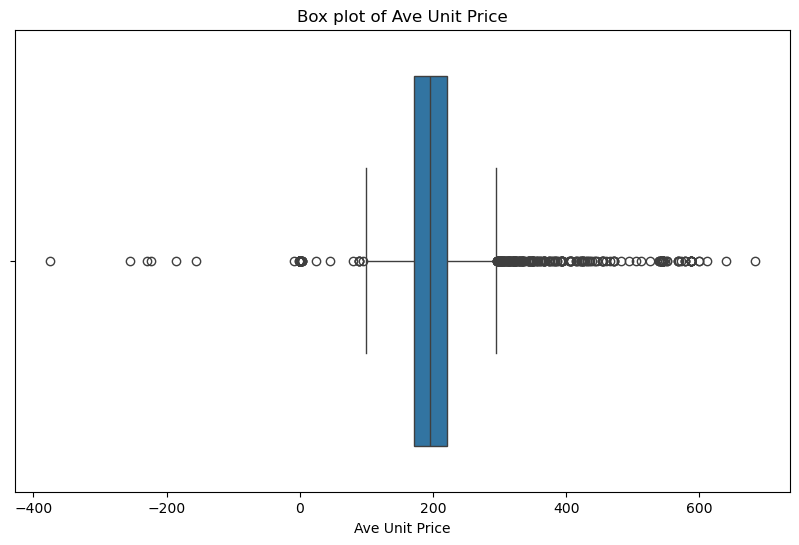

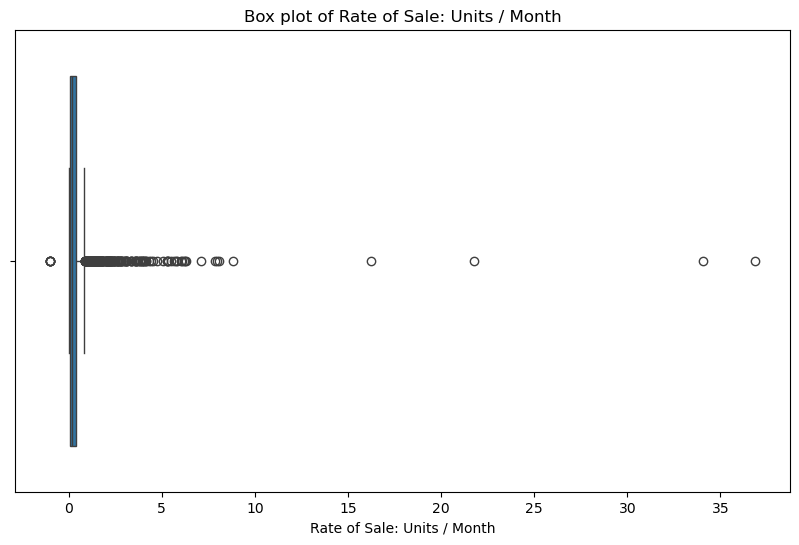

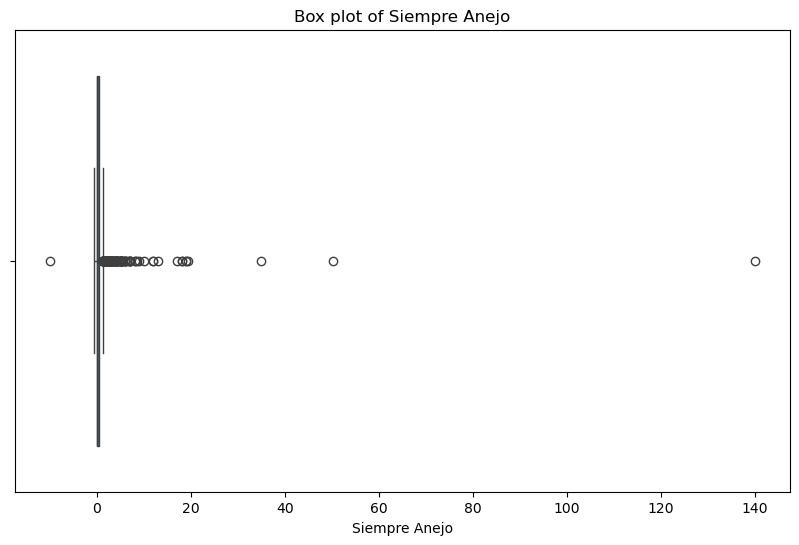

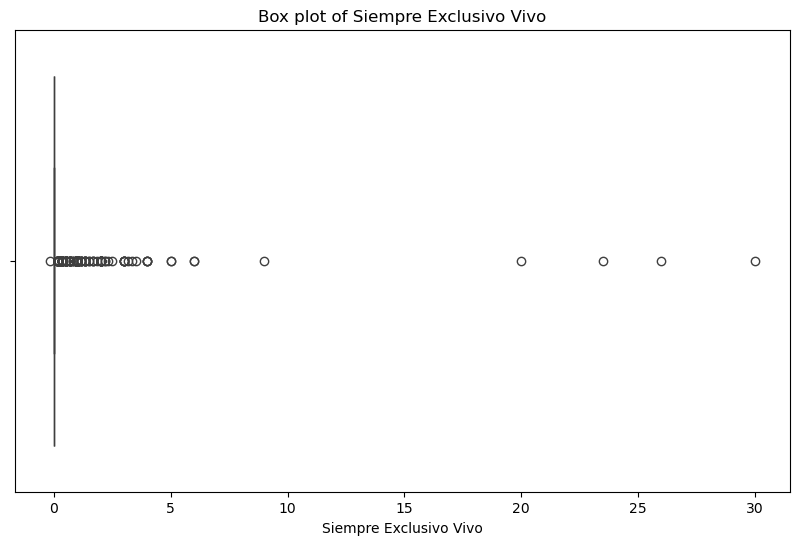

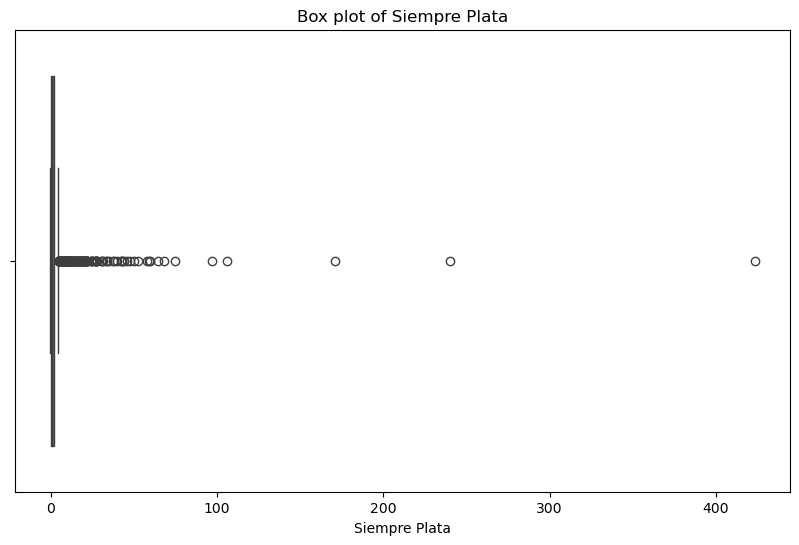

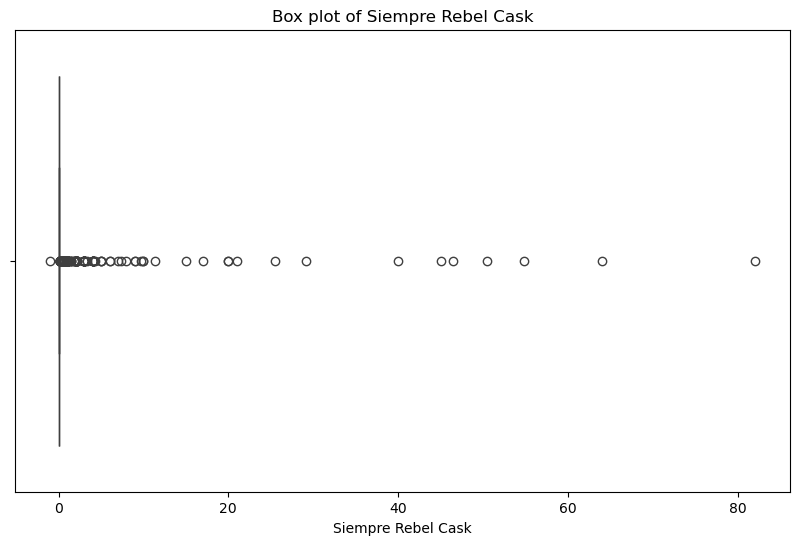

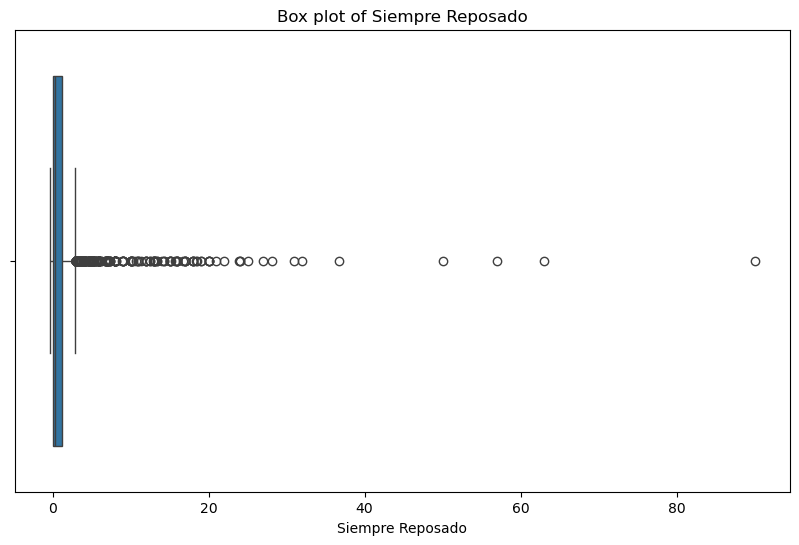

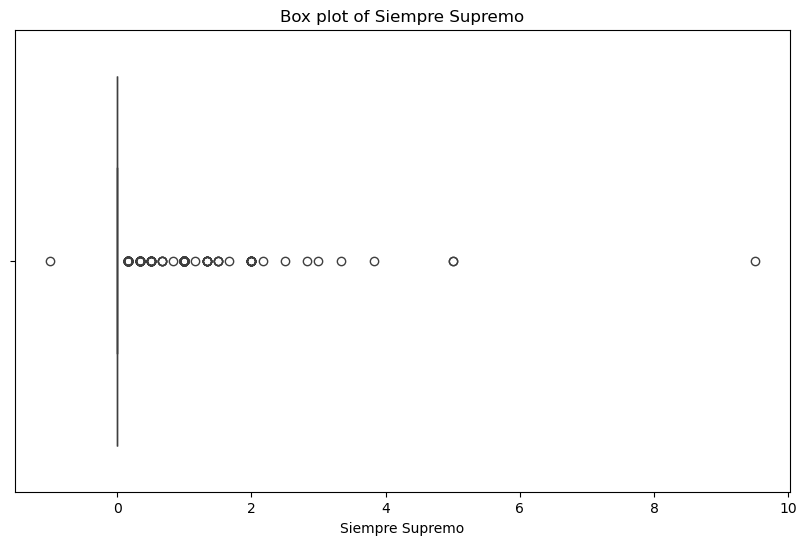

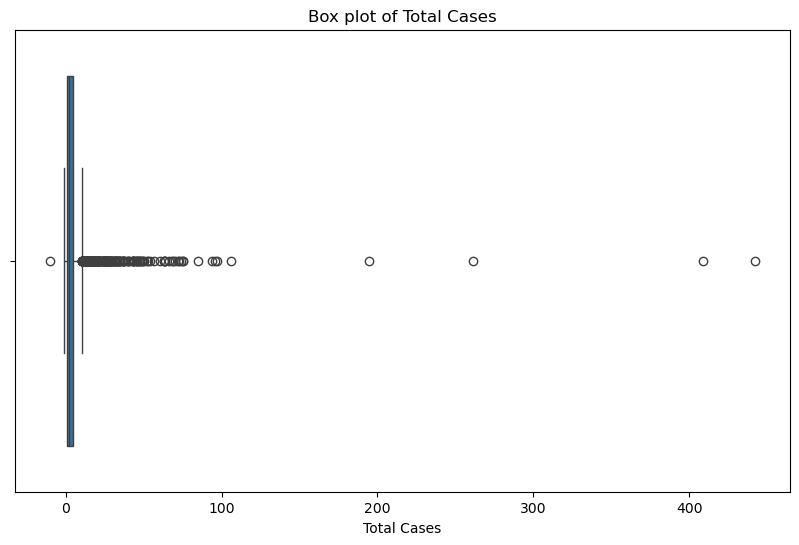

In [13]:
# Box plots to detect outliers

columns_to_exclude = ['Dist. STATE', 'Account ID', 'City', 'Did Buys']

# Selecting numeric columns and excluding specific ones
numeric_columns = df.select_dtypes(include=['number']).columns.difference(columns_to_exclude)

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

**Note:** Going to keep the outliers for now in order to get a true sense of the data ''as-is'' in my analysis.

## 2. Feature Selection

Considering the project's goal, the below features are most relevant for customer segmentation based on purchasing behavior:

- OnOff Premises
- Classes of Trade
- Siempre product columns (e.g., Siempre Plata, Siempre Reposado, etc.) for understanding product preferences
- Total Cases
- Purchases
- Months Purchased
- Rate of Sale: Units / Month
- Ave Unit Price

In [14]:
# Chosing which columns I should keep

columns_to_keep = [
    'OnOff Premises', 'Classes of Trade',
    'Siempre Plata', 'Siempre Reposado', 'Siempre Anejo', 
    'Siempre Supremo', 'Siempre Rebel Cask', 'Siempre Exclusivo Vivo',
    'Total Cases', '# Purchases', '# Months Purchased',
    'Rate of Sale: Units / Month', 'Ave Unit Price'
]

# Creating a new dataframe with only the columns that are most relevant to keep.
# I.E not including the geographical columns or account ID.

data_behavioral = df[columns_to_keep]

In [15]:
#Checking the few first rows of the new dataframe.
data_behavioral.head()

,OnOff Premises,Classes of Trade,Siempre Plata,Siempre Reposado,Siempre Anejo,Siempre Supremo,Siempre Rebel Cask,Siempre Exclusivo Vivo,Total Cases,# Purchases,# Months Purchased,Rate of Sale: Units / Month,Ave Unit Price
0,ON,RESTAURANT,423.333333,18.000001,0.333334,0.000000,0.000000,0.333334,442.000002,44,12,36.833334,123.371266
1,ON,BAR/TAVERN,74.833332,0.333334,0.166667,0.000000,0.000000,0.000000,75.333333,52,12,6.277778,133.786129
2,ON,HOTEL/ MOTEL,58.166664,0.666667,5.000000,0.666667,1.000000,0.666667,66.166665,32,12,5.513889,163.255923
3,ON,RESTAURANT,37.333325,0.000000,0.000000,0.000000,0.000000,0.000000,37.333325,27,12,3.111110,135.810298
4,ON,RESTAURANT,27.333334,15.666666,0.000000,0.000000,0.166667,0.166667,43.333334,20,10,3.611111,145.509921


## 3. Encoding and Scaling

In [16]:
# Columns that need encoding
categorical_features = ['OnOff Premises', 'Classes of Trade']
numerical_features = columns_to_keep[2:]

In [17]:
# Defining a transformer for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_keep[2:]),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [18]:
# Applying the transformations
data_preprocessed = preprocessor.fit_transform(data_behavioral)

In [19]:
data_preprocessed

array([[38.85756148,  4.48488033, -0.06920792, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.68593513, -0.28108473, -0.12444574, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.1473589 , -0.19116095,  1.4774476 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.22227144, -0.37100877, -0.12444574, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22227144, -0.37100877, -0.12444574, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22227144, -0.37100877, -0.17968355, ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
# Getting feature names for the transformed DataFrame
# For numerical features, I kept the original names
# For categorical features, I used get_feature_names_out from the OneHotEncoder

encoded_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

In [21]:
# Combine all feature names
all_feature_names = numerical_features + encoded_feature_names

In [22]:
# Convert the NumPy array back to a DataFrame with the new column names
data_preprocessed_df = pd.DataFrame(data_preprocessed, columns=all_feature_names)

In [23]:
# Display the first few rows to verify
data_preprocessed_df.head()

,Siempre Plata,Siempre Reposado,Siempre Anejo,Siempre Supremo,Siempre Rebel Cask,Siempre Exclusivo Vivo,Total Cases,# Purchases,# Months Purchased,Rate of Sale: Units / Month,...,Classes of Trade_MILITARY ON-PREMISE,Classes of Trade_NON-RETAIL,Classes of Trade_OTHER ON PREMISE,Classes of Trade_RECREATION/ ENTERTAINMENT,Classes of Trade_RESTAURANT,Classes of Trade_RETAIL-SPECIALTY SERVICES,Classes of Trade_SMALL GROCERY STORE,Classes of Trade_SUPERMARKET,Classes of Trade_TASTING ROOM,Classes of Trade_WHOLESALE CLUB
0,38.857561,4.484880,-0.069208,-0.210382,-0.109429,0.189103,29.198780,8.197360,3.968877,29.156703,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6.685935,-0.281085,-0.124446,-0.210382,-0.109429,-0.142310,4.706951,9.813942,3.968877,4.698157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.147359,-0.191161,1.477448,1.649776,0.230471,0.520515,4.094655,5.772488,3.968877,4.086693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.224138,-0.371009,-0.179684,-0.210382,-0.109429,-0.142310,2.168707,4.762124,3.968877,2.163362,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.300993,3.855413,-0.179684,-0.210382,-0.052779,0.023397,2.569483,3.347615,3.123760,2.563593,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Checking the dataframe's info to make sure we have all our columns
data_preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Siempre Plata                               3088 non-null   float64
 1   Siempre Reposado                            3088 non-null   float64
 2   Siempre Anejo                               3088 non-null   float64
 3   Siempre Supremo                             3088 non-null   float64
 4   Siempre Rebel Cask                          3088 non-null   float64
 5   Siempre Exclusivo Vivo                      3088 non-null   float64
 6   Total Cases                                 3088 non-null   float64
 7   # Purchases                                 3088 non-null   float64
 8   # Months Purchased                          3088 non-null   float64
 9   Rate of Sale: Units / Month                 3088 non-null   float64
 10  Ave Unit Pri

## 3. Correlation Analysis

In [27]:
data_preprocessed_df.corr()

,Siempre Plata,Siempre Reposado,Siempre Anejo,Siempre Supremo,Siempre Rebel Cask,Siempre Exclusivo Vivo,Total Cases,# Purchases,# Months Purchased,Rate of Sale: Units / Month,...,Classes of Trade_MILITARY ON-PREMISE,Classes of Trade_NON-RETAIL,Classes of Trade_OTHER ON PREMISE,Classes of Trade_RECREATION/ ENTERTAINMENT,Classes of Trade_RESTAURANT,Classes of Trade_RETAIL-SPECIALTY SERVICES,Classes of Trade_SMALL GROCERY STORE,Classes of Trade_SUPERMARKET,Classes of Trade_TASTING ROOM,Classes of Trade_WHOLESALE CLUB
Siempre Plata,1.000000,0.329550,0.406414,0.070994,0.043438,0.210329,0.911441,0.462185,0.292582,0.909897,...,0.157166,0.045810,-0.003447,0.014641,-0.018763,-0.003447,-0.013034,0.000709,0.073353,0.122033
Siempre Reposado,0.329550,1.000000,0.177700,0.153057,0.076926,0.150724,0.550775,0.531619,0.410073,0.549347,...,-0.006678,0.081446,-0.005059,-0.028270,-0.043827,-0.002631,-0.015758,-0.002173,0.093733,-0.021147
Siempre Anejo,0.406414,0.177700,1.000000,0.117813,0.084804,0.428184,0.587860,0.155109,0.169908,0.586955,...,-0.003234,0.083730,-0.003234,-0.014541,-0.055883,0.005714,-0.004496,0.007710,0.081843,-0.029133
Siempre Supremo,0.070994,0.153057,0.117813,1.000000,0.140556,0.394239,0.191057,0.135061,0.159681,0.190293,...,-0.003787,0.204313,-0.003787,-0.021019,-0.072115,0.063173,-0.004900,-0.033419,0.100150,-0.011992
Siempre Rebel Cask,0.043438,0.076926,0.084804,0.140556,1.000000,0.183706,0.279791,0.067656,0.079552,0.279176,...,-0.001970,0.014606,-0.001970,-0.014189,-0.046394,-0.001970,-0.009267,-0.016435,0.032665,-0.006237
Siempre Exclusivo Vivo,0.210329,0.150724,0.428184,0.394239,0.183706,1.000000,0.388526,0.068998,0.080924,0.387698,...,-0.002561,0.064618,-0.002561,-0.018718,-0.055103,-0.002561,0.003293,-0.022259,0.220373,-0.008111
Total Cases,0.911441,0.550775,0.587860,0.191057,0.279791,0.388526,1.000000,0.518477,0.372374,0.998152,...,0.110765,0.082290,-0.005048,-0.003885,-0.050236,-0.001041,-0.015956,-0.003996,0.116401,0.075134
# Purchases,0.462185,0.531619,0.155109,0.135061,0.067656,0.068998,0.518477,1.000000,0.856933,0.517934,...,0.092984,0.124925,-0.008851,-0.009585,0.035284,-0.001577,-0.033836,-0.016875,0.063003,0.008827
# Months Purchased,0.292582,0.410073,0.169908,0.159681,0.079552,0.080924,0.372374,0.856933,1.000000,0.372381,...,0.063828,0.096975,-0.012226,-0.015888,0.012651,0.002985,-0.042977,-0.003684,0.075680,-0.017041
Rate of Sale: Units / Month,0.909897,0.549347,0.586955,0.190293,0.279176,0.387698,0.998152,0.517934,0.372381,1.000000,...,0.110571,0.081980,-0.005084,-0.000518,-0.048691,-0.001082,-0.016146,-0.004372,0.116137,0.074135


**Product Sales and Total Cases:**

- Looks like Siempre Plata really drives our total sales, with a correlation of 0.911441. It's a big player in how many cases we sell.
- Siempre Anejo isn't far behind, with a correlation of 0.587860 with total cases. It's definitely doing its part in boosting our case numbers.

**Rate of Sale:**

- The rate at which we sell stuff each month is super close to our total case numbers, with a correlation of 0.998152. Makes sense, right? More sales mean more cases out the door.
- Both Siempre Plata and Siempre Anejo influence our monthly sales rate a lot, with correlations of 0.909897 and 0.586955, respectively. They're key to keeping our sales humming.

**Products and Each Other:**

- There's a bit of a connection between Siempre Plata and Siempre Anejo sales, with a correlation of 0.406414. Buying one might mean you're likely to pick up the other too.

**Buying Habits:**

- The number of purchases and the number of months people buy from us are tightly linked, with a correlation of 0.856933. If someone buys a lot, they tend to do it over many months, showing they stick with us for a while.


## 4. KMeans Clustering


I'm running KMeans clustering for this analysis to uncover hidden patterns and segments within our customer base based on their purchasing behaviors. By grouping customers into distinct clusters, I aim to identify unique characteristics and preferences that define each segment. 

### Determining the Optimal Number of Clusters

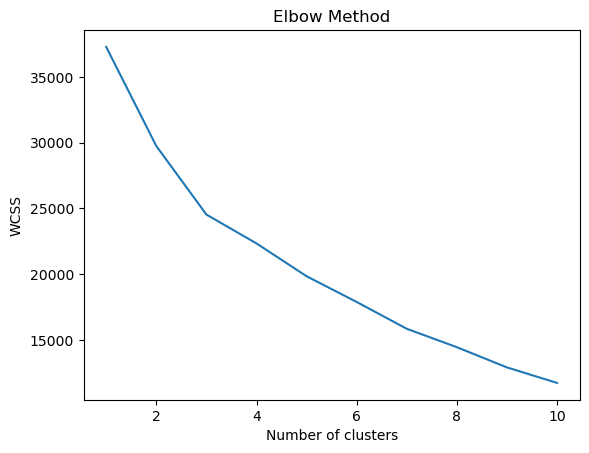

In [28]:
# Select only the scaled features for clustering
features = data_preprocessed_df

# Calculate WCSS (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# We can see here that the optimal amount of clusters is between 3 and 7.
# We will use 5 clusters

### Running KMeans Clustering

In [29]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features)

# Add the cluster labels to the DataFrame
data_preprocessed_df['Cluster'] = cluster_labels

### Analyzing the Clusters

In [31]:
# Checking the cluster centers
print(kmeans.cluster_centers_)

[[-8.17099494e-02 -1.18964286e-01 -4.42641227e-02 -1.85034332e-02
  -5.21299951e-02 -5.56664040e-03 -1.08560825e-01 -2.30404181e-01
  -2.21355419e-01 -1.11696630e-01  1.15824732e-01  1.00000000e+00
   4.99600361e-16  1.52655666e-16 -1.99493200e-17  1.83381089e-02
   5.73065903e-04  1.71919771e-03 -3.98986399e-17  9.14613181e-01
  -8.13151629e-19  6.30372493e-03 -8.13151629e-19  5.55111512e-17
  -1.66533454e-16  5.73065903e-04  1.37535817e-02  4.06876791e-02
  -5.63785130e-18  3.43839542e-03]
 [-1.55223799e-01 -2.48341331e-01 -1.28603492e-01 -1.52195364e-01
  -9.53084027e-02 -1.10561647e-01 -2.29524512e-01 -2.61250033e-01
  -3.13711961e-01 -2.23068447e-01 -1.72360869e-01  1.95503421e-03
   9.98044966e-01  3.06940371e-01  1.95503421e-02 -2.25514052e-17
  -5.96311195e-19 -2.49366500e-18  3.51906158e-02  9.77517107e-04
  -5.96311195e-19 -1.47451495e-17  9.77517107e-04  4.98533724e-02
   5.83577713e-01 -5.96311195e-19 -1.99493200e-17 -5.20417043e-17
   1.95503421e-03  9.77517107e-04]
 [ 7.1

In [32]:
# Analyzing clusters
cluster_analysis = data_preprocessed_df.groupby('Cluster').mean()
cluster_analysis

,Siempre Plata,Siempre Reposado,Siempre Anejo,Siempre Supremo,Siempre Rebel Cask,Siempre Exclusivo Vivo,Total Cases,# Purchases,# Months Purchased,Rate of Sale: Units / Month,...,Classes of Trade_MILITARY ON-PREMISE,Classes of Trade_NON-RETAIL,Classes of Trade_OTHER ON PREMISE,Classes of Trade_RECREATION/ ENTERTAINMENT,Classes of Trade_RESTAURANT,Classes of Trade_RETAIL-SPECIALTY SERVICES,Classes of Trade_SMALL GROCERY STORE,Classes of Trade_SUPERMARKET,Classes of Trade_TASTING ROOM,Classes of Trade_WHOLESALE CLUB
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.081710,-0.118964,-0.044264,-0.018503,-0.052130,-0.005567,-0.108561,-0.230404,-0.221355,-0.111697,...,0.000000,0.006304,0.000000,0.000000,0.000000,0.000573,0.013754,0.040688,0.000000,0.003438
1,-0.155224,-0.248341,-0.128603,-0.152195,-0.095308,-0.110562,-0.229525,-0.261250,-0.313712,-0.223068,...,0.000000,0.000000,0.000978,0.049853,0.583578,0.000000,0.000000,0.000000,0.001955,0.000978
2,0.712000,1.366982,0.489107,0.531863,0.107576,0.211772,1.000323,2.060142,2.249738,0.997254,...,0.003257,0.032573,0.000000,0.019544,0.218241,0.000000,0.000000,0.016287,0.009772,0.009772
3,20.406188,10.284970,14.347833,3.277413,1.929975,12.368508,21.492204,7.490106,2.595562,21.460599,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000
4,0.129892,0.093598,0.139468,1.288078,16.413524,0.925575,3.463805,0.765574,0.682310,3.456700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
# Downloading the cluster_analysis to CSV so I can take a full look at it in Excel.

cluster_analysis.to_csv('cluster_analysis.csv')

## 5. PCA
By transforming our large set of variables into a smaller set of uncorrelated components, PCA will help us identify the underlying patterns and the most influential factors in customer purchasing behavior.

In [37]:
# Initialize PCA
pca = PCA()
pca.fit(data_preprocessed_df)

PCA()

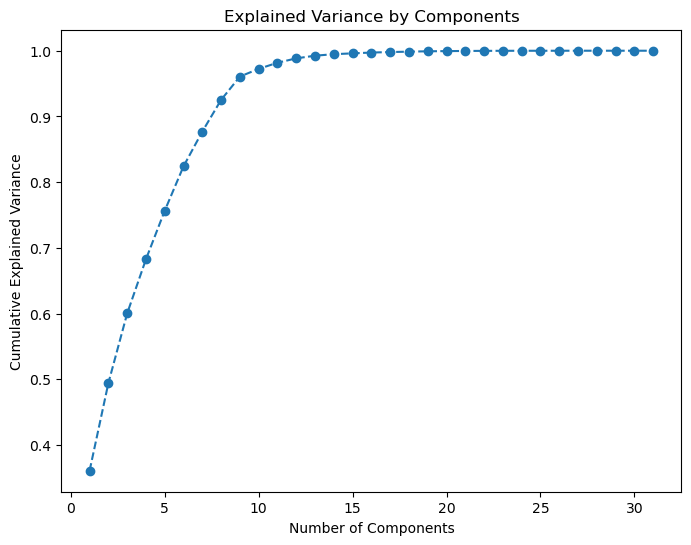

In [38]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [39]:
# Here it looks like having 8 components is ideal

In [41]:
# Applying PCA with 8 components
pca = PCA(n_components=8)
pca_result = pca.fit_transform(data_preprocessed_df)
pca_result

array([[46.36390192,  1.23925778, 21.83949148, ...,  2.6914945 ,
        18.26389679, 15.14361272],
       [11.17745743, -5.32890039,  0.96884422, ...,  1.87913711,
         0.5712069 ,  4.91126326],
       [ 9.59435882, -2.37619006,  0.08050743, ...,  1.32979608,
         0.06678161,  3.966922  ],
       ...,
       [-0.88908511,  0.29433023, -0.21225318, ...,  1.43099094,
         0.78638794, -0.2357086 ],
       [-0.88908511,  0.29433023, -0.21225318, ...,  1.43099094,
         0.78638794, -0.2357086 ],
       [-0.80786643,  1.96477389, -1.52878118, ...,  2.16562304,
         0.83198061, -0.38259649]])

In [43]:
# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8'])

In [44]:
pca_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8
0,46.363902,1.239258,21.839491,-4.320136,7.048638,2.691495,18.263897,15.143613
1,11.177457,-5.328900,0.968844,-1.069421,0.662924,1.879137,0.571207,4.911263
2,9.594359,-2.376190,0.080507,-0.144935,-0.472943,1.329796,0.066782,3.966922
3,5.871113,-3.926617,-0.121021,0.067260,-0.020011,1.467615,-0.398654,2.804555
4,6.468516,-3.621726,-0.177942,-0.228124,0.092203,0.066056,1.150423,-1.116373
...,...,...,...,...,...,...,...,...
3083,-1.026190,1.570311,-1.364363,-1.709833,1.368429,2.111837,0.949938,-0.190020
3084,-0.807866,1.964774,-1.528781,-1.595739,1.102413,2.165623,0.831981,-0.382596
3085,-0.889085,0.294330,-0.212253,0.561192,0.178823,1.430991,0.786388,-0.235709
3086,-0.889085,0.294330,-0.212253,0.561192,0.178823,1.430991,0.786388,-0.235709


In [45]:
# Adding back Clusters for visualization purposes
pca_df['Cluster'] = data_preprocessed_df['Cluster']

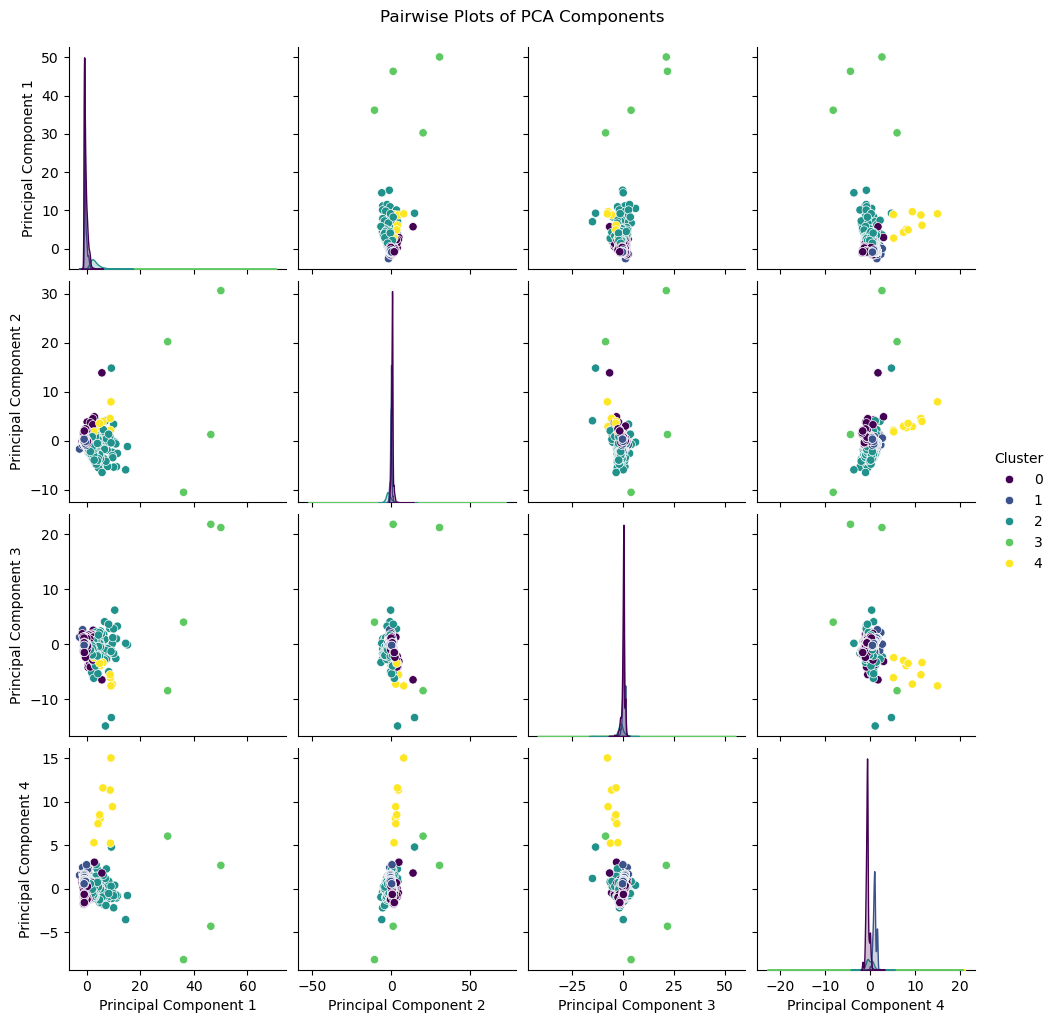

In [46]:
# Pair Plot so we can visualize all 4 components and their relationship to each other.

sns.pairplot(pca_df, hue='Cluster', vars=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'], palette='viridis')
plt.suptitle('Pairwise Plots of PCA Components', y=1.02)
plt.show()

## 6. Cluster Profiles Overview

### Cluster 1: Low Volume Clients
- **Purchasing Behavior:** These clients make selective purchases, typically aligned with specific events or seasons of the year. Possibly also only purchasing when special deals are offered.
- **Client Profile:** Primarily event organizers and small restaurant owners who seek distinctive offerings to enhance their events.
- **Strategy Insight:** Highlighting product exclusivity and offering event-centric promotions could effectively engage this segment.

### Cluster 2: Niche Hospitality Venues
- **Purchasing Behavior:** Demonstrates a preference for quality, with purchases made on a more regular basis than the first group, though still selective.
- **Client Profile:** Includes boutique bars and specialized venues that aim to provide unique experiences to their patrons.
- **Strategy Insight:** Providing exclusive products and marketing support can help these establishments elevate their customer experience.

### Cluster 3: Volume Purchasers
- **Purchasing Behavior:** Characterized by consistent, high-volume purchases for resale or supply to large-scale sales volumes.
- **Client Profile:** This group consists of wholesalers, retail outlets, and major event organizers seeking reliable bulk purchasing options.
- **Strategy Insight:** Offering volume discounts, ensuring consistent supply, and providing marketing materials can strengthen partnerships.

### Cluster 4: Retail and Hospitality Chains
- **Purchasing Behavior:** Exhibits very high purchase volumes, indicating a steady demand for business operations or corporate events.
- **Client Profile:** Comprises large chain corporations, hospitality chains, and institutional clients with varied needs.
- **Strategy Insight:** Tailored account management and bespoke product offerings can meet their diverse requirements and foster long-term relationships.

### Cluster 5: Luxury and Premium Segment
- **Purchasing Behavior:** Prefers premium products, focusing on quality and exclusivity to enhance their high-end service offerings.
- **Client Profile:** Luxury hotels, upscale restaurants, and exclusive clubs seeking to offer premium experiences.
- **Strategy Insight:** Developing exclusive product lines or experiences tailored for the luxury market can offer competitive advantages.